# Script to run a restart
This script run the model from a rest state during 10 years in order to produce a restart start.

In [1]:
## Import package
from neuralsw.model.shalw import SWmodel
import neuralsw
import numpy as np
import xarray as xr
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib notebook


In [2]:
## Specify the output
PLOT = True #if plot is wanted

#rootdir
rootdir = os.path.realpath(\
	os.path.join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#restartfile
rstfile = os.path.join(datadir,'restart_10years.nc')

#Duration of the integration
endtime = 48*30*12*40 #40 years (can be override by option in allsets)

#save frequency
freq = 48*30 #each month (can be overrieded by option in allsets)

#restarttest
rstfile_test = os.path.join(datadir,'restart_test.nc')

print('data directory:',datadir)


data directory: /net/argos/data/parvati/jbrlod/jbrlod/these/postdoc/collaborations/bigdata/sw/data


In [3]:
## Specifiy types of dataset to run
allsets = {0:{'suf':'std'},
           1:{'suf':'windvar','a':1,'sig':1}}

selected = 0 #to be change to create more sets

dset = allsets[selected]

#training file 
trainame = os.path.join(datadir,'train_dataset_'+dset['suf']+'.nc')

#test file
testname = os.path.join(datadir,'test_dataset_'+dset['suf']+'.nc')


print('trainame:',trainame)
print('testname:',testname)

trainame: /net/argos/data/parvati/jbrlod/jbrlod/these/postdoc/collaborations/bigdata/sw/data/train_dataset_std.nc
testname: /net/argos/data/parvati/jbrlod/jbrlod/these/postdoc/collaborations/bigdata/sw/data/test_dataset_std.nc


In [4]:
## redefine some options
if 'endtime' in dset:
    endtime = dset['endtime']
if 'freq' in dset:
    freq = dset['freq']

In [5]:
## Init model for training set
SW = SWmodel(nx=80,ny=80)
SW.inistate_rst(rstfile)
SW.set_time(0)

#Save every month
SW.save(time=np.arange(0,endtime,freq),name=trainame)

In [6]:
# run the model for training set
for i in tqdm(range(endtime)):
    SW.next()

100%|██████████| 691200/691200 [16:46<00:00, 686.72it/s]


In [7]:
# Save the restart for test set
SW.save_rst(rstfile_test)


/usr/home/jbrlod/data/anaconda2/envs/nn/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


<IPython.core.display.Javascript object>


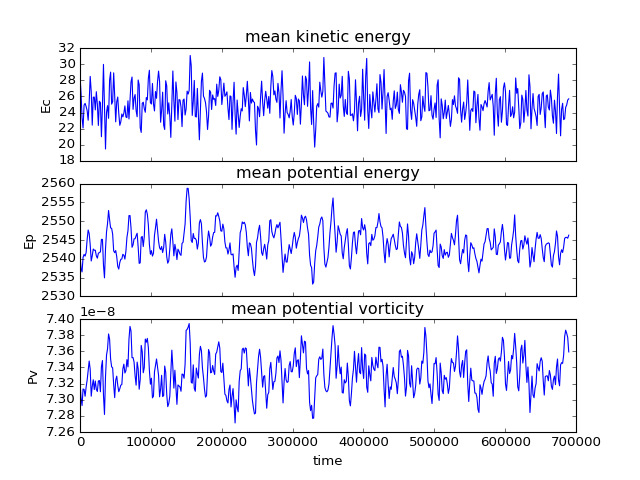

In [8]:
## Plots conservative quantities for training set
if PLOT:
    import neuralsw.model.modeltools as model

    ds = xr.open_dataset(trainame)

    fig,ax = plt.subplots(nrows=3,sharex=True)
    Ec = model.cinetic_ener(ds=ds)
    Ep = model.potential_ener(ds=ds)
    Pv = model.potential_vor(ds=ds)
    Ec.plot(ax=ax[0])
    Ep.plot(ax=ax[1])
    Pv.plot(ax=ax[2])
    ax[0].set_title('mean kinetic energy')
    ax[0].set_ylabel('Ec')
    ax[0].set_xlabel('')
    ax[1].set_title('mean potential energy')
    ax[1].set_ylabel('Ep')
    ax[1].set_xlabel('')
    ax[2].set_title('mean potential vorticity')
    ax[2].set_ylabel('Pv')
    plt.show()

<IPython.core.display.Javascript object>


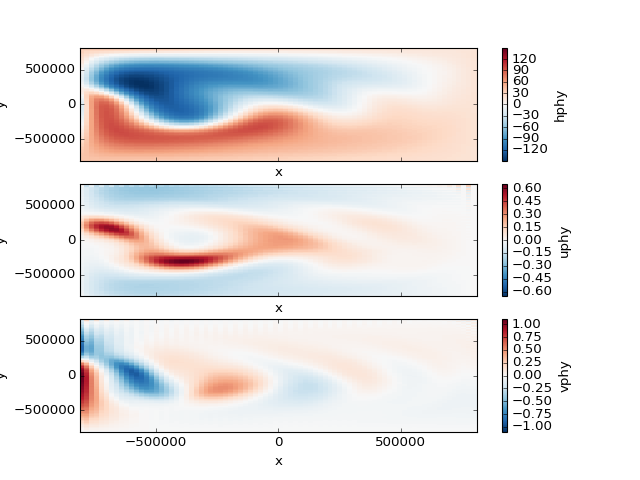

<IPython.core.display.Javascript object>

In [13]:
## Plots mean states for training
if PLOT:
    ds = xr.open_dataset(trainame)

    fig,ax = plt.subplots(nrows=3,sharex=True)
    ds['hphy'].mean(dim='time').plot(ax=ax[0])
    ds['uphy'].mean(dim='time').plot(ax=ax[1])
    ds['vphy'].mean(dim='time').plot(ax=ax[2])

    plt.show()
    
    fig,ax = plt.subplots(nrows=3,sharex=True)
    ds['hphy'].std(dim='time').plot(ax=ax[0])
    ds['uphy'].std(dim='time').plot(ax=ax[1])
    ds['vphy'].std(dim='time').plot(ax=ax[2])

    plt.show()
    
    